<a href="https://colab.research.google.com/github/AshHydroCoder/GRACE-Downscaler/blob/Branch1/GRACE_RFM_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Random Forest Model

In [3]:
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler

path = '/content/drive/MyDrive/Thesis/RFM/Training'
cluster = 'Cluster 1'


# Load the CSV file, keeping 'time' as a regular column
df_ori = pd.read_csv(os.path.join(path, f'{cluster}/combined_csv.csv'))
#df_ori = pd.read_csv(f'/content/drive/MyDrive/Thesis/Terai/{cluster}/combined_csv.csv')

# Exclude 'time', 'lat', and 'lon' from normalization
columns_to_exclude = ['time', 'y', 'x','lwe_thickness']
columns_to_normalize = df_ori.columns.difference(columns_to_exclude)

# Normalize only the selected columns
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_ori[columns_to_normalize])

# Create a new DataFrame with normalized data and reattach the excluded columns
df_normalized = pd.DataFrame(df_normalized, columns=columns_to_normalize)
# Create a new DataFrame with normalized data and reattach the excluded columns
df_normalized = pd.DataFrame(df_normalized, columns=columns_to_normalize)
df = pd.concat([df_ori[columns_to_exclude], df_normalized], axis=1)
df = df.dropna()
df




,time,y,x,lwe_thickness,Evap_tavg,NDVI,Qs_tavg,SM,SWE_inst,aspect,elevation,precipitation,slope
2,2003-02-01,27.375,84.375,3.716865,0.271961,0.778289,0.007116,0.208229,0.000000,0.634545,0.071397,0.073764,0.362379
3,2003-02-01,27.625,84.375,3.716865,0.236544,0.613565,0.005673,0.132094,0.000000,0.575006,0.016652,0.077173,0.004624
7,2003-02-01,27.125,84.625,3.716865,0.238263,0.653280,0.004727,0.115475,0.000000,0.485990,0.002462,0.066308,0.009193
8,2003-02-01,27.375,84.625,3.716865,0.301755,0.701934,0.007239,0.231493,0.000000,0.628251,0.032690,0.076214,0.024860
12,2003-02-01,26.875,84.875,3.716865,0.267400,0.716044,0.002528,0.124323,0.000000,0.426565,0.000000,0.053473,0.002755
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14386,2016-12-01,27.875,87.625,-20.652456,0.072666,0.250153,0.008713,0.655701,0.000263,0.653076,0.726769,0.001704,0.288915
14391,2016-12-01,27.625,87.875,-20.652456,0.114479,0.621547,0.000040,0.459396,0.000003,0.687164,0.421942,0.002716,0.831350
14392,2016-12-01,27.875,87.875,-20.652456,0.056420,0.198304,0.003693,0.739171,0.087111,0.646590,0.703019,0.001491,0.453042
14397,2016-12-01,27.625,88.125,-20.652456,0.144050,0.115504,0.013182,0.932042,0.537754,0.119251,0.949089,0.002556,1.000000


In [4]:
#!pip install tensorflow_decision_forests
import tensorflow_decision_forests as tfdf
import pandas as pd
df_ori = df_ori.dropna()

from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df_ori, test_size=0.2, random_state=21)
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label="lwe_thickness", task=tfdf.keras.Task.REGRESSION)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label="lwe_thickness", task=tfdf.keras.Task.REGRESSION)
model = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.REGRESSION)
model.compile(metrics=["mse"])
model.fit(x=train_ds)
evaluation = model.evaluate(test_ds, return_dict=True)
from sklearn.metrics import r2_score
# Calculate R² for testing data
predictions_test = model.predict(test_ds)
y_true_test = test_df["lwe_thickness"]
y_pred_test = predictions_test.flatten()
r2_test = r2_score(y_true_test, y_pred_test)

# Calculate R² for training data
predictions_train = model.predict(train_ds)
y_true_train = train_df["lwe_thickness"]
y_pred_train = predictions_train.flatten()
r2_train = r2_score(y_true_train, y_pred_train)

# Print R² values
print(f"R² Score on Training Data: {r2_train}")
print(f"R² Score on Testing Data: {r2_test}")

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 71.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 68.2 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
  Attempting uninstall: tf-keras
    Found existing installation: tf_keras 2.17.0
    Uninstalling tf_keras-2.17.0:
   

Use /tmp/tmp8_uwmtyq as temporary training directory
Reading training dataset...
Training dataset read in 0:00:07.037479. Found 5760 examples.
Training model...
Model trained in 0:00:06.778041
Compiling model...
Model compiled.
6/6 [==============================] - 2s 406ms/step
R² Score on Training Data: 0.9941908639806203
R² Score on Testing Data: 0.9841579785596765


In [9]:
import tensorflow_decision_forests as tfdf
import pandas as pd
df_ori = df_ori.dropna()
exclude = ['x','y','lwe_thickness']
target = ['lwe_thickness']
feature_columns = [col for col in df_ori.columns if col not in exclude]

from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df_ori, test_size=0.2, random_state=21)
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df[feature_columns+target], label='lwe_thickness', task=tfdf.keras.Task.REGRESSION)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df[feature_columns+target], label= 'lwe_thickness', task=tfdf.keras.Task.REGRESSION)
model = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.REGRESSION)
model.compile(metrics=["mse"])
model.fit(x=train_ds)
evaluation = model.evaluate(test_ds, return_dict=True)
from sklearn.metrics import r2_score
# Calculate R² for testing data
predictions_test = model.predict(test_ds)
y_true_test = test_df["lwe_thickness"]
y_pred_test = predictions_test.flatten()
r2_test = r2_score(y_true_test, y_pred_test)

# Calculate R² for training data
predictions_train = model.predict(train_ds)
y_true_train = train_df["lwe_thickness"]
y_pred_train = predictions_train.flatten()
r2_train = r2_score(y_true_train, y_pred_train)

# Print R² values
print(f"R² Score on Training Data: {r2_train}")
print(f"R² Score on Testing Data: {r2_test}")

Use /tmp/tmpa9xk0pgu as temporary training directory
Reading training dataset...


Training dataset read in 0:00:00.541776. Found 5760 examples.
Training model...
Model trained in 0:00:13.641778
Compiling model...
Model compiled.


6/6 [==============================] - 1s 116ms/step
R² Score on Training Data: 0.9938857441377186
R² Score on Testing Data: 0.9829076003446289


In [ ]:
df_ori

,time,y,x,precipitation,SWE_inst,SM,Qs_tavg,Evap_tavg,NDVI,lwe_thickness,elevation,slope,aspect
0,2003-02-01,26.875,84.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2003-02-01,27.125,84.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2003-02-01,27.375,84.375,0.086563,0.000000,0.262678,1.061340e-06,0.000023,6629.9375,3.716865,581.677990,18.712178,223.846086
3,2003-02-01,27.625,84.375,0.090563,0.000000,0.243667,8.460946e-07,0.000020,5102.8125,3.716865,192.820579,0.565097,204.416657
4,2003-02-01,27.875,84.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14395,2016-12-01,27.125,88.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14396,2016-12-01,27.375,88.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14397,2016-12-01,27.625,88.125,0.003000,55092.848240,0.443416,1.966181e-06,0.000012,485.3750,-20.652456,6815.895642,51.055452,55.690848
14398,2016-12-01,27.875,88.125,0.002000,102424.191162,0.440919,6.765448e-08,0.000012,-290.1250,-20.652456,7177.512626,11.782663,173.492873


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
X =df.drop(['lwe_thickness','x','y','time'], axis=1)
y = df['lwe_thickness']


In [ ]:
X

,Evap_tavg,aspect,elevation,slope,SoilMoi00_10cm_tavg,SoilMoi100_200cm_tavg,SoilMoi10_40cm_tavg,SoilMoi40_100cm_tavg,NDVI,precipitation,Qs_tavg,SWE_inst
1,0.000022,245.842589,68.989243,0.204816,0.223674,0.368811,0.196011,0.187771,5350.0625,0.040000,6.995459e-07,0.0
2,0.000021,167.506144,83.868672,0.573595,0.223054,0.369423,0.186495,0.179262,4811.7500,0.055500,3.628992e-07,0.0
5,0.000019,148.376922,64.760386,0.812282,0.217708,0.373856,0.184688,0.174508,5521.8750,0.038063,1.058235e-06,0.0
6,0.000017,294.482190,93.342925,1.098871,0.220301,0.372877,0.178090,0.170949,5436.3125,0.053750,4.452320e-07,0.0
9,0.000016,262.032071,66.615664,0.584041,0.210313,0.377796,0.177543,0.168992,5172.0625,0.038938,1.064802e-06,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7186,0.000019,329.909900,1106.485007,29.182045,0.219207,0.373931,0.257125,0.273687,6528.0000,0.001000,1.833171e-10,0.0
7188,0.000014,194.748858,63.320129,0.386694,0.231006,0.374640,0.337619,0.350046,3546.7500,0.000750,9.144242e-12,0.0
7189,0.000018,175.136278,112.936461,0.601675,0.234408,0.373894,0.314485,0.333620,4432.1250,0.000938,1.258983e-11,0.0
7192,0.000014,214.812721,67.587645,0.325698,0.233539,0.374398,0.333714,0.347749,3840.0000,0.001000,6.111483e-12,0.0


# K-fold cross validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Define the number of splits for K-Fold cross-validation
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=21)

# Initialize the model
model = RandomForestRegressor()

# Perform cross-validation using all available cores (parallel computing)
scores = cross_val_score(model, X, y, cv=kf, scoring='r2', n_jobs=-1)

# Print the results
print("Cross-validation R2 scores:", scores)
print("Mean R2 score:", scores.mean())


Cross-validation R2 scores: [0.65690979 0.53556356 0.60999564 0.54625566 0.61520424 0.6037502
 0.56307094 0.60300594 0.60292187 0.58313892]
Mean R2 score: 0.5919816763157151


In [ ]:
import numpy as np
from sklearn.model_selection import KFold

# Assuming X is your feature matrix
num_samples = X.shape[0]  # Get the total number of samples
k = 10  # Number of folds

# Calculate the size of each fold
fold_size = num_samples // k  # Integer division
remaining_samples = num_samples % k  # Remainder to account for any leftover samples

print(f"Total samples: {num_samples}")
print(f"Size of each fold: {fold_size}")

# If you want to see how many samples each fold will have
fold_sizes = [fold_size + 1 if i < remaining_samples else fold_size for i in range(k)]
print(f"Sizes of each fold: {fold_sizes}")


Total samples: 7200
Size of each fold: 720
Sizes of each fold: [720, 720, 720, 720, 720, 720, 720, 720, 720, 720]


In [ ]:
# Check feature importances
importances = model.fit(X, y).feature_importances_
print("Feature importances:", importances)


Feature importances: [0.09712563 0.13674423 0.11000457 0.37519609 0.05065912 0.01876992
 0.03117073 0.15777966 0.02255006]


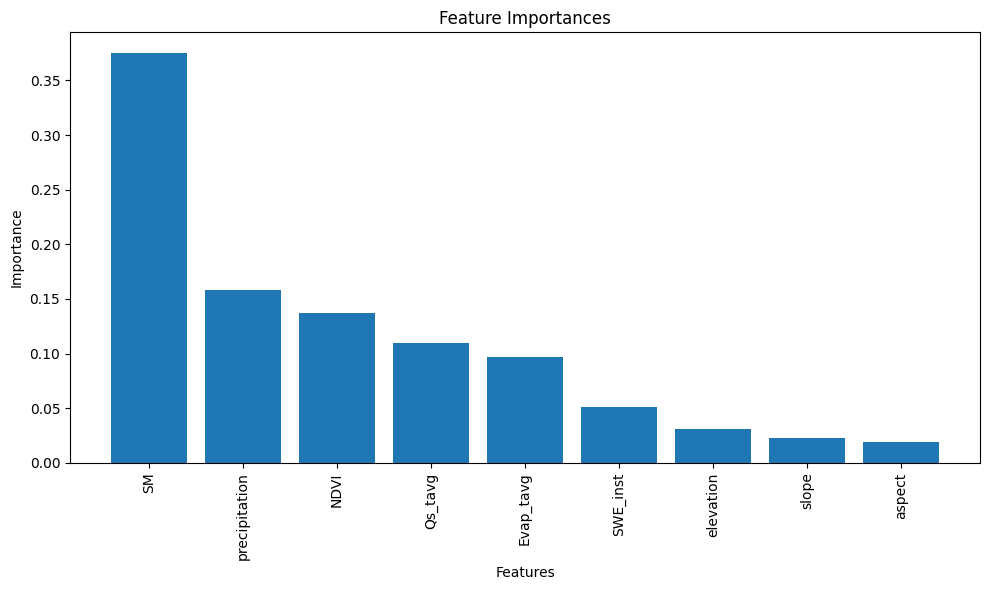

In [ ]:
# Plotting the feature importances
feature_names = X.columns
indices = np.argsort(importances)[::-1]  # Sort the features by importance

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), np.array(feature_names)[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [ ]:
# Save the trained model to a file
import joblib
joblib.dump(model, '/content/drive/My Drive/Thesis/RFM/k-fold-RFM.pkl')
print("Model saved as 'random_forest_model.pkl'")

In [ ]:
import numpy as np

average_r2 = np.mean(scores)

print(f"R² Score for each fold: {[round(score, 4) for score in scores]}")
print(f"Average R² across {k} folds: {average_r2:.2f}")

R² Score for each fold: [0.6054, 0.6159, 0.608, 0.6015, 0.5942, 0.6028, 0.6099, 0.6083, 0.6085, 0.6049]
Average R² across 10 folds: 0.61


# Simple Split

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model_rf = RandomForestRegressor(random_state = 21)
print(model_rf.get_params())  # change parameter as necessary (currently default)

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 21, 'verbose': 0, 'warm_start': False}


In [ ]:
print(f"Number of samples used to train the model: {X_train.shape[0]}")

Number of samples used to train the model: 3600


In [ ]:
#train model

model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=21)

In [ ]:
import joblib

# Save the trained model to a file
joblib.dump(model_rf, '/content/drive/My Drive/Thesis/RFM/Cluster 5.pkl')

['/content/drive/My Drive/Thesis/RFM/Cluster 5.pkl']

## Import RFM

In [ ]:
import joblib
model_rf = joblib.load('/content/drive/My Drive/Thesis/RFM/random_forest_model.pkl')

In [ ]:
model_rf.score(X_test,y_test)


0.5893490573375153

In [ ]:
model_rf.score(X_train,y_train)

0.9424770193267605

In [ ]:
y_predicted = model_rf.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_predicted)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_predicted)
print("Mean Absolute Error:", mae)


# Calculate Nash-Sutcliffe Efficiency coefficient
nse = 1 - (np.sum((y_test - y_predicted)**2) / np.sum((y_test - np.mean(y_test))**2))
print("Nash-Sutcliffe Efficiency:", nse)

# Calculate Pearson correlation coefficient
correlation_coefficient, _ = pearsonr(y_test, y_predicted)
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")

rmse = np.sqrt(mse)
nrmse = rmse / (np.max(y_test) - np.min(y_test))
print("Normalized Root Mean Square Error:", rmse)

Mean Squared Error: 90.2486929599168
Mean Absolute Error: 7.005850274323486
Nash-Sutcliffe Efficiency: 0.5893490573375153
Pearson Correlation Coefficient: 0.7681481395964613
Normalized Root Mean Square Error: 9.499931208167604


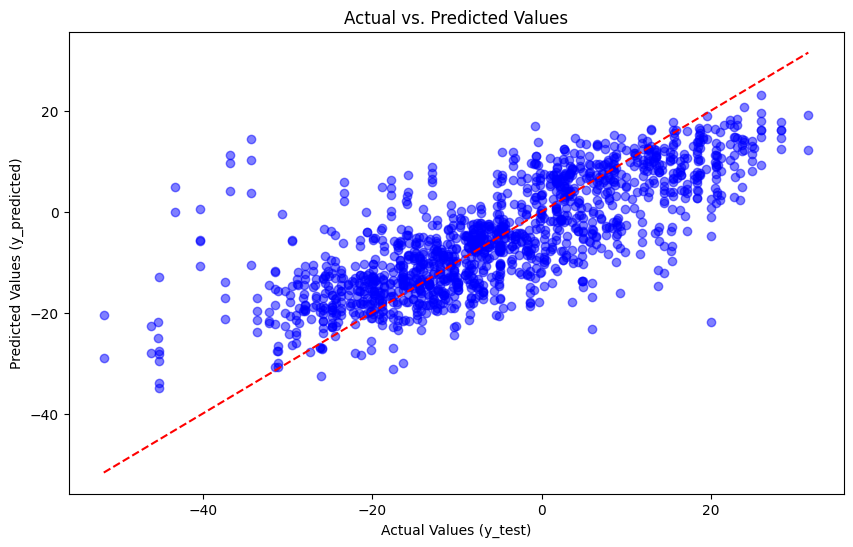

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predicted, color='blue', alpha=0.5)
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_predicted)')
plt.title('Actual vs. Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Add a diagonal line
plt.show()

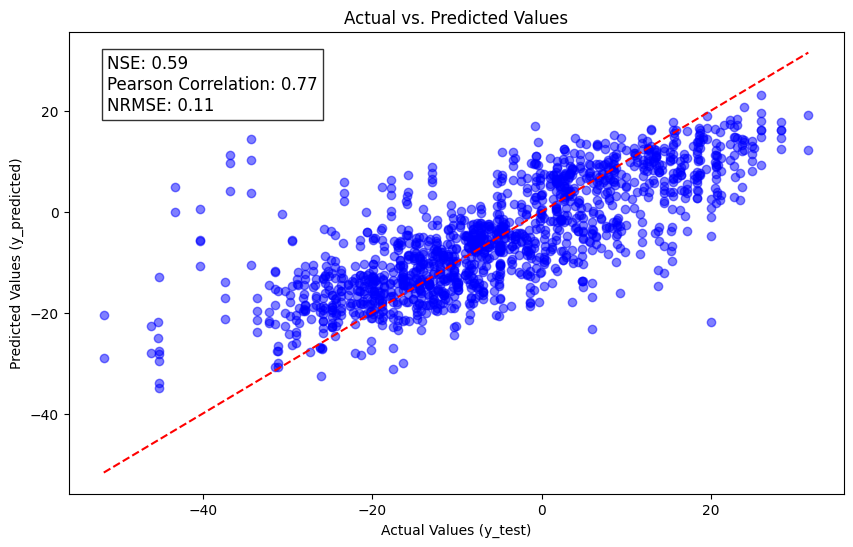

Plot saved successfully to /content/drive/MyDrive/Thesis/Output/actual_vs_predicted_plot.png


<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import os

# Calculate metrics
mse = mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(mse)
nrmse = rmse / (np.max(y_test) - np.min(y_test))

# Calculate Nash-Sutcliffe Efficiency coefficient
nse = 1 - (np.sum((y_test - y_predicted)**2) / np.sum((y_test - np.mean(y_test))**2))

# Calculate Pearson correlation coefficient
correlation_coefficient, _ = pearsonr(y_test, y_predicted)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predicted, color='blue', alpha=0.5)
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_predicted)')
plt.title('Actual vs. Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Add metrics to the plot
text_metrics = f"NSE: {nse:.2f}\nPearson Correlation: {correlation_coefficient:.2f}\nNRMSE: {nrmse:.2f}"
plt.text(0.05, 0.95, text_metrics, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

# Show the plot
plt.show()

# Define the output path
output_path = '/content/drive/MyDrive/Thesis/Output'

# Ensure the directory exists
os.makedirs(output_path, exist_ok=True)

# Save the plot as an image file
output_file = os.path.join(output_path, 'actual_vs_predicted_plot.png')
plt.savefig(output_file, dpi=300, bbox_inches='tight')

print(f"Plot saved successfully to {output_file}")


### Feature Importance

         Feature  Importance
3             SM    0.373746
7  precipitation    0.157321
1           NDVI    0.143347
2        Qs_tavg    0.109234
0      Evap_tavg    0.092226
4       SWE_inst    0.048158
6      elevation    0.028088
8          slope    0.025107
5         aspect    0.022773


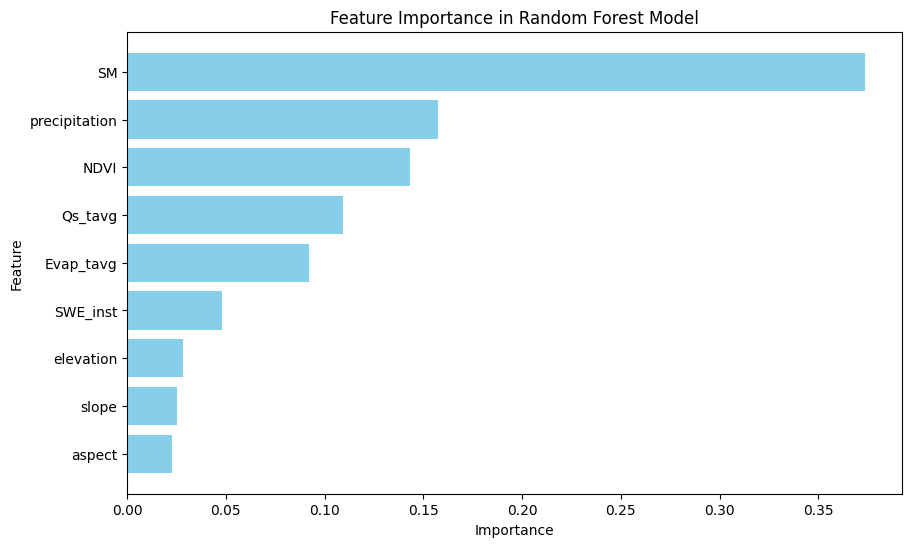

In [ ]:
importances = model_rf.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Model')
plt.gca().invert_yaxis()  # To display the most important features at the top
plt.show()

### Correlation among variables

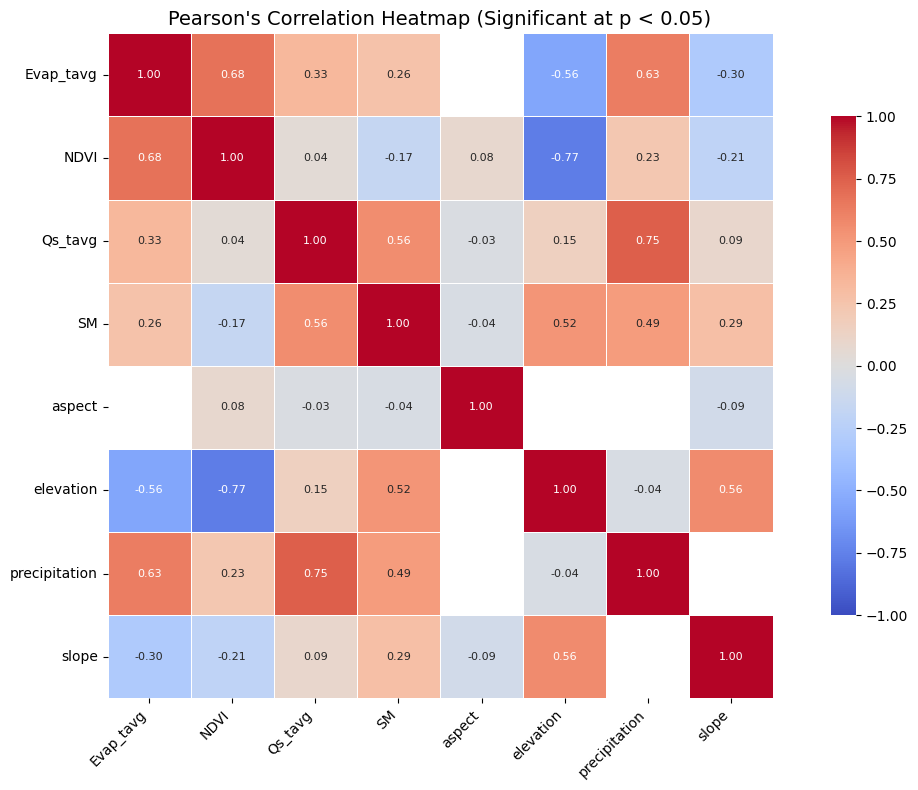

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load the required libraries
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Function to calculate Pearson's correlation and p-values
def calculate_pearsonr(df):
    # Create empty DataFrames to store correlation and p-values
    corr_matrix = pd.DataFrame(index=df.columns, columns=df.columns)
    p_value_matrix = pd.DataFrame(index=df.columns, columns=df.columns)

    # Loop through columns and calculate Pearson's correlation coefficient and p-values
    for col1 in df.columns:
        for col2 in df.columns:
            corr, p_value = pearsonr(df[col1], df[col2])
            corr_matrix.loc[col1, col2] = corr
            p_value_matrix.loc[col1, col2] = p_value

    # Convert to numeric type (floating point)
    corr_matrix = corr_matrix.astype(float)
    p_value_matrix = p_value_matrix.astype(float)

    return corr_matrix, p_value_matrix

# Exclude 'time', 'lat', 'lon', 'lwe_thickness' (if needed for visualization)
df_analysis = df.drop(columns=['time', 'x', 'y', 'lwe_thickness','SWE_inst'])

# Calculate correlation and p-values
corr_matrix, p_value_matrix = calculate_pearsonr(df_analysis)

# Create a mask for significant correlations (p < 0.05)
significance_mask = p_value_matrix < 0.05

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=~significance_mask,
            square=True, linewidths=.5, vmin=-1, vmax=1, cbar_kws={"shrink": .75},
            annot_kws={"size": 8}, fmt=".2f")

# Set titles and labels
plt.title("Pearson's Correlation Heatmap (Significant at p < 0.05)", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.8 MB/s eta 0:00:00


# Optuna

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score
def objective(trial):
  n_estimators = trial.suggest_int('n_estimators', 100, 500)
  max_depth = trial.suggest_int('max_depth', 5, 10)
  min_samples_split = trial.suggest_int('min_samples_split', 2, 5)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 5, 50)
  max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])
  criterion = trial.suggest_categorical('criterion', ["squared_error", "absolute_error"])
  model = RandomForestRegressor(n_estimators=n_estimators, max_depth= None,
                                min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                max_features=max_features, criterion=criterion,bootstrap = True,random_state = 21)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

    # metric  to optimize
  score = r2_score(y_test, y_pred)

  return score

study = optuna.create_study(direction='minimize', sampler=optuna.samplers.RandomSampler(seed=42))
study.optimize(objective, n_trials=200,n_jobs=-1)

# Print the best parameters found
print("Best trial:")
trial = study.best_trial

print("Value: {:.4f}".format(trial.value))

print("Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))


[I 2025-01-02 16:23:56,473] A new study created in memory with name: no-name-22f07f69-ac3e-488c-a045-a5da8127a095
[I 2025-01-02 16:23:59,394] Trial 0 finished with value: 0.4925666632095018 and parameters: {'n_estimators': 104, 'max_depth': 6, 'min_samples_split': 3, 'min_samples_leaf': 34, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 0 with value: 0.4925666632095018.
[I 2025-01-02 16:24:10,985] Trial 1 finished with value: 0.5056159571337189 and parameters: {'n_estimators': 347, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 26, 'max_features': 'log2', 'criterion': 'squared_error'}. Best is trial 0 with value: 0.4925666632095018.
[I 2025-01-02 16:24:21,651] Trial 2 finished with value: 0.5590516181717864 and parameters: {'n_estimators': 451, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 0 with value: 0.4925666632095018.
[I 2025-01-02 16:25:37,311] Trial 3 finished

KeyboardInterrupt: 

In [ ]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50,300)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 5)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 5, 50)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])
    criterion = trial.suggest_categorical('criterion', ["squared_error", "absolute_error"])

    model = RandomForestRegressor(
        n_estimators=n_estimators, max_depth=max_depth,
        min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
        max_features=max_features, criterion=criterion, bootstrap=True,
        random_state=21
    )

    # Cross-validation for stability and to reduce overfitting
    score = cross_val_score(model, X_train, y_train, cv=5, scoring="r2").mean()
    print(f"Trial {trial.number} - R2 score: {score:.4f}")  # Print score for each trial

    return -score  # Minimize negative R² to maximize R²

study = optuna.create_study(direction='minimize', sampler=optuna.samplers.RandomSampler(seed=42))
study.optimize(objective, n_trials=200, n_jobs=-1)

print("Best trial:")
trial = study.best_trial
print("Value: {:.4f}".format(-trial.value))  # Invert sign to show positive R²
print("Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))


[I 2024-10-25 17:49:57,766] A new study created in memory with name: no-name-93b42dd9-d2bb-4939-93a5-883873ca129f
[I 2024-10-25 17:50:44,074] Trial 11 finished with value: -0.511803132817515 and parameters: {'n_estimators': 57, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 9, 'max_features': 'log2', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 11 - R2 score: 0.5118


[I 2024-10-25 17:50:46,293] Trial 45 finished with value: -0.3768865437346462 and parameters: {'n_estimators': 62, 'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 42, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 45 - R2 score: 0.3769


[I 2024-10-25 17:50:48,492] Trial 71 finished with value: -0.49055350743855036 and parameters: {'n_estimators': 55, 'max_depth': 9, 'min_samples_split': 4, 'min_samples_leaf': 27, 'max_features': 'log2', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.
[I 2024-10-25 17:50:48,566] Trial 67 finished with value: -0.4451744916341597 and parameters: {'n_estimators': 57, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 43, 'max_features': 'log2', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 71 - R2 score: 0.4906
Trial 67 - R2 score: 0.4452


[I 2024-10-25 17:50:49,824] Trial 77 finished with value: -0.3976749994114619 and parameters: {'n_estimators': 63, 'max_depth': 3, 'min_samples_split': 3, 'min_samples_leaf': 49, 'max_features': 'log2', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.
[I 2024-10-25 17:50:49,835] Trial 43 finished with value: -0.4754883057260697 and parameters: {'n_estimators': 59, 'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 23, 'max_features': 'log2', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 77 - R2 score: 0.3977
Trial 43 - R2 score: 0.4755


[I 2024-10-25 17:50:53,342] Trial 91 finished with value: -0.42610858348579017 and parameters: {'n_estimators': 64, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 8, 'max_features': 'log2', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 91 - R2 score: 0.4261


[I 2024-10-25 17:50:58,305] Trial 76 finished with value: -0.4481881806366482 and parameters: {'n_estimators': 74, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 22, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 76 - R2 score: 0.4482


[I 2024-10-25 17:51:04,135] Trial 3 finished with value: -0.3985478783314252 and parameters: {'n_estimators': 102, 'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 43, 'max_features': 'log2', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 3 - R2 score: 0.3985


[I 2024-10-25 17:51:09,712] Trial 69 finished with value: -0.47002263322165827 and parameters: {'n_estimators': 88, 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 28, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 69 - R2 score: 0.4700


[I 2024-10-25 17:51:10,059] Trial 58 finished with value: -0.48551994367281887 and parameters: {'n_estimators': 86, 'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 23, 'max_features': 'log2', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 58 - R2 score: 0.4855


[I 2024-10-25 17:51:20,455] Trial 92 finished with value: -0.4801430385606521 and parameters: {'n_estimators': 103, 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 34, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 92 - R2 score: 0.4801


[I 2024-10-25 17:51:20,769] Trial 81 finished with value: -0.37800311075936943 and parameters: {'n_estimators': 113, 'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 25, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 81 - R2 score: 0.3780


[I 2024-10-25 17:51:21,312] Trial 2 finished with value: -0.3793335134762591 and parameters: {'n_estimators': 132, 'max_depth': 3, 'min_samples_split': 4, 'min_samples_leaf': 35, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.
[I 2024-10-25 17:51:21,499] Trial 19 finished with value: -0.46799142173187674 and parameters: {'n_estimators': 115, 'max_depth': 8, 'min_samples_split': 4, 'min_samples_leaf': 34, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 2 - R2 score: 0.3793
Trial 19 - R2 score: 0.4680


[I 2024-10-25 17:51:22,394] Trial 15 finished with value: -0.4037843671011531 and parameters: {'n_estimators': 127, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 31, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 15 - R2 score: 0.4038


[I 2024-10-25 17:51:23,961] Trial 57 finished with value: -0.4260548306479359 and parameters: {'n_estimators': 114, 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 16, 'max_features': 'log2', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 57 - R2 score: 0.4261


[I 2024-10-25 17:51:33,478] Trial 55 finished with value: -0.40390325299656793 and parameters: {'n_estimators': 132, 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 41, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 55 - R2 score: 0.4039


[I 2024-10-25 17:51:35,125] Trial 102 finished with value: -0.47220010707416044 and parameters: {'n_estimators': 60, 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 46, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 102 - R2 score: 0.4722


[I 2024-10-25 17:51:38,645] Trial 82 finished with value: -0.4469217225158671 and parameters: {'n_estimators': 140, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 35, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 82 - R2 score: 0.4469


[I 2024-10-25 17:51:40,842] Trial 6 finished with value: -0.48439058481719305 and parameters: {'n_estimators': 142, 'max_depth': 8, 'min_samples_split': 4, 'min_samples_leaf': 28, 'max_features': 'log2', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 6 - R2 score: 0.4844


[I 2024-10-25 17:51:41,787] Trial 60 finished with value: -0.45535519088585463 and parameters: {'n_estimators': 145, 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 45, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 60 - R2 score: 0.4554


[I 2024-10-25 17:51:45,772] Trial 85 finished with value: -0.49520108739039487 and parameters: {'n_estimators': 135, 'max_depth': 9, 'min_samples_split': 5, 'min_samples_leaf': 22, 'max_features': 'log2', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 85 - R2 score: 0.4952


[I 2024-10-25 17:51:47,974] Trial 97 finished with value: -0.4466016762316226 and parameters: {'n_estimators': 98, 'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 24, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 97 - R2 score: 0.4466


[I 2024-10-25 17:51:49,122] Trial 59 finished with value: -0.4052080297929569 and parameters: {'n_estimators': 162, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 38, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 59 - R2 score: 0.4052


[I 2024-10-25 17:51:49,448] Trial 63 finished with value: -0.44799004331563647 and parameters: {'n_estimators': 161, 'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 26, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 63 - R2 score: 0.4480


[I 2024-10-25 17:51:52,451] Trial 39 finished with value: -0.4315640870327737 and parameters: {'n_estimators': 168, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 20, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 39 - R2 score: 0.4316


[I 2024-10-25 17:51:52,741] Trial 1 finished with value: -0.4804611841178847 and parameters: {'n_estimators': 169, 'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 12, 'max_features': 'log2', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 1 - R2 score: 0.4805


[I 2024-10-25 17:51:57,713] Trial 32 finished with value: -0.4499204805788681 and parameters: {'n_estimators': 175, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 'log2', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 32 - R2 score: 0.4499


[I 2024-10-25 17:51:59,290] Trial 46 finished with value: -0.46976638733756787 and parameters: {'n_estimators': 175, 'max_depth': 8, 'min_samples_split': 4, 'min_samples_leaf': 30, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 46 - R2 score: 0.4698


[I 2024-10-25 17:52:02,042] Trial 12 finished with value: -0.43086757037233986 and parameters: {'n_estimators': 204, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 21, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 12 - R2 score: 0.4309


[I 2024-10-25 17:52:06,504] Trial 47 finished with value: -0.39983814162446574 and parameters: {'n_estimators': 196, 'max_depth': 3, 'min_samples_split': 3, 'min_samples_leaf': 14, 'max_features': 'log2', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 47 - R2 score: 0.3998


[I 2024-10-25 17:52:12,070] Trial 107 finished with value: -0.455462753038665 and parameters: {'n_estimators': 88, 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 42, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 107 - R2 score: 0.4555


[I 2024-10-25 17:52:13,354] Trial 95 finished with value: -0.3999842453600019 and parameters: {'n_estimators': 212, 'max_depth': 3, 'min_samples_split': 3, 'min_samples_leaf': 23, 'max_features': 'log2', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 95 - R2 score: 0.4000


[I 2024-10-25 17:52:17,219] Trial 48 finished with value: -0.40500598368759083 and parameters: {'n_estimators': 221, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 19, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 48 - R2 score: 0.4050


[I 2024-10-25 17:52:19,602] Trial 26 finished with value: -0.37934741736455513 and parameters: {'n_estimators': 238, 'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 18, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 26 - R2 score: 0.3793


[I 2024-10-25 17:52:22,086] Trial 13 finished with value: -0.46225970906304853 and parameters: {'n_estimators': 221, 'max_depth': 6, 'min_samples_split': 4, 'min_samples_leaf': 35, 'max_features': 'log2', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 13 - R2 score: 0.4623


[I 2024-10-25 17:52:25,480] Trial 7 finished with value: -0.37902012623751047 and parameters: {'n_estimators': 259, 'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 21, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 7 - R2 score: 0.3790


[I 2024-10-25 17:52:25,879] Trial 20 finished with value: -0.4732511624879662 and parameters: {'n_estimators': 227, 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 22, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 20 - R2 score: 0.4733


[I 2024-10-25 17:52:26,617] Trial 79 finished with value: -0.4312694218690952 and parameters: {'n_estimators': 233, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 16, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 79 - R2 score: 0.4313


[I 2024-10-25 17:52:28,584] Trial 119 finished with value: -0.4621738336998509 and parameters: {'n_estimators': 72, 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 20, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.
[I 2024-10-25 17:52:28,745] Trial 93 finished with value: -0.42683200386319564 and parameters: {'n_estimators': 233, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 33, 'max_features': 'log2', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 119 - R2 score: 0.4622
Trial 93 - R2 score: 0.4268


[I 2024-10-25 17:52:31,294] Trial 74 finished with value: -0.4785812424674195 and parameters: {'n_estimators': 230, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 35, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 74 - R2 score: 0.4786


[I 2024-10-25 17:52:34,854] Trial 80 finished with value: -0.4271057872783275 and parameters: {'n_estimators': 254, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 34, 'max_features': 'log2', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 80 - R2 score: 0.4271


[I 2024-10-25 17:52:35,319] Trial 27 finished with value: -0.44670038709433146 and parameters: {'n_estimators': 260, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 33, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.
[I 2024-10-25 17:52:35,357] Trial 62 finished with value: -0.48402618718184093 and parameters: {'n_estimators': 243, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 26, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 27 - R2 score: 0.4467
Trial 62 - R2 score: 0.4840


[I 2024-10-25 17:52:36,949] Trial 118 finished with value: -0.4451577625513387 and parameters: {'n_estimators': 98, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 38, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 118 - R2 score: 0.4452


[I 2024-10-25 17:52:37,719] Trial 42 finished with value: -0.43162528014446294 and parameters: {'n_estimators': 256, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 12, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 42 - R2 score: 0.4316


[I 2024-10-25 17:52:40,086] Trial 10 finished with value: -0.4471176408042024 and parameters: {'n_estimators': 281, 'max_depth': 6, 'min_samples_split': 3, 'min_samples_leaf': 30, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 10 - R2 score: 0.4471


[I 2024-10-25 17:52:41,342] Trial 117 finished with value: -0.3987566489497428 and parameters: {'n_estimators': 122, 'max_depth': 3, 'min_samples_split': 3, 'min_samples_leaf': 37, 'max_features': 'log2', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 117 - R2 score: 0.3988


[I 2024-10-25 17:52:42,273] Trial 88 finished with value: -0.4823556118670023 and parameters: {'n_estimators': 255, 'max_depth': 9, 'min_samples_split': 4, 'min_samples_leaf': 20, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 88 - R2 score: 0.4824


[I 2024-10-25 17:52:45,189] Trial 90 finished with value: -0.4696463187596721 and parameters: {'n_estimators': 266, 'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 30, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.
[I 2024-10-25 17:52:45,265] Trial 133 finished with value: -0.3823039879650888 and parameters: {'n_estimators': 50, 'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 90 - R2 score: 0.4696
Trial 133 - R2 score: 0.3823


[I 2024-10-25 17:52:46,326] Trial 87 finished with value: -0.4892654571020286 and parameters: {'n_estimators': 247, 'max_depth': 9, 'min_samples_split': 5, 'min_samples_leaf': 33, 'max_features': 'log2', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 87 - R2 score: 0.4893


[I 2024-10-25 17:52:47,333] Trial 37 finished with value: -0.5063912111569385 and parameters: {'n_estimators': 247, 'max_depth': 9, 'min_samples_split': 4, 'min_samples_leaf': 7, 'max_features': 'log2', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 37 - R2 score: 0.5064


[I 2024-10-25 17:52:50,796] Trial 61 finished with value: -0.4281647553084233 and parameters: {'n_estimators': 295, 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 10, 'max_features': 'log2', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 61 - R2 score: 0.4282


[I 2024-10-25 17:52:51,381] Trial 138 finished with value: -0.43066731451229323 and parameters: {'n_estimators': 52, 'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 26, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.
[I 2024-10-25 17:52:51,471] Trial 104 finished with value: -0.4893632668651242 and parameters: {'n_estimators': 181, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 40, 'max_features': 'log2', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 138 - R2 score: 0.4307
Trial 104 - R2 score: 0.4894


[I 2024-10-25 17:52:51,692] Trial 110 finished with value: -0.4642754595082705 and parameters: {'n_estimators': 172, 'max_depth': 6, 'min_samples_split': 3, 'min_samples_leaf': 24, 'max_features': 'log2', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 110 - R2 score: 0.4643


[I 2024-10-25 17:52:54,241] Trial 123 finished with value: -0.38055027187721807 and parameters: {'n_estimators': 147, 'max_depth': 3, 'min_samples_split': 3, 'min_samples_leaf': 39, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 123 - R2 score: 0.3806


[I 2024-10-25 17:53:01,124] Trial 121 finished with value: -0.43192697994012086 and parameters: {'n_estimators': 172, 'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 121 - R2 score: 0.4319


[I 2024-10-25 17:53:03,276] Trial 128 finished with value: -0.4044990040696696 and parameters: {'n_estimators': 137, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 27, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 128 - R2 score: 0.4045


[I 2024-10-25 17:53:05,669] Trial 148 finished with value: -0.4886514111555879 and parameters: {'n_estimators': 53, 'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 148 - R2 score: 0.4887


[I 2024-10-25 17:53:07,899] Trial 120 finished with value: -0.40417243773425093 and parameters: {'n_estimators': 200, 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 32, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 120 - R2 score: 0.4042


[I 2024-10-25 17:53:15,068] Trial 136 finished with value: -0.4301501277700462 and parameters: {'n_estimators': 141, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 34, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 136 - R2 score: 0.4302


[I 2024-10-25 17:53:15,626] Trial 151 finished with value: -0.37905470714505274 and parameters: {'n_estimators': 91, 'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 28, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 151 - R2 score: 0.3791


[I 2024-10-25 17:53:19,502] Trial 111 finished with value: -0.45465050446643274 and parameters: {'n_estimators': 268, 'max_depth': 7, 'min_samples_split': 4, 'min_samples_leaf': 48, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 111 - R2 score: 0.4547


[I 2024-10-25 17:53:22,394] Trial 132 finished with value: -0.46421103858155127 and parameters: {'n_estimators': 170, 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 18, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 132 - R2 score: 0.4642


[I 2024-10-25 17:53:30,554] Trial 126 finished with value: -0.48633104859887377 and parameters: {'n_estimators': 220, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 23, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 126 - R2 score: 0.4863


[I 2024-10-25 17:53:31,799] Trial 122 finished with value: -0.48581889066306905 and parameters: {'n_estimators': 225, 'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 26, 'max_features': 'log2', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 122 - R2 score: 0.4858


[I 2024-10-25 17:53:44,282] Trial 159 finished with value: -0.43188850400068296 and parameters: {'n_estimators': 158, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 18, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 159 - R2 score: 0.4319


[I 2024-10-25 17:53:46,997] Trial 146 finished with value: -0.46634120681845104 and parameters: {'n_estimators': 206, 'max_depth': 6, 'min_samples_split': 3, 'min_samples_leaf': 12, 'max_features': 'log2', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 146 - R2 score: 0.4663


[I 2024-10-25 17:53:53,564] Trial 147 finished with value: -0.4725967809806135 and parameters: {'n_estimators': 214, 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 38, 'max_features': 'log2', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 147 - R2 score: 0.4726


[I 2024-10-25 17:53:55,192] Trial 155 finished with value: -0.40134505544681326 and parameters: {'n_estimators': 277, 'max_depth': 3, 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_features': 'log2', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 155 - R2 score: 0.4013


[I 2024-10-25 17:53:59,342] Trial 131 finished with value: -0.4824574266140308 and parameters: {'n_estimators': 292, 'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'log2', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 131 - R2 score: 0.4825


[I 2024-10-25 17:54:00,709] Trial 166 finished with value: -0.48018058644279443 and parameters: {'n_estimators': 66, 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 9, 'max_features': 'log2', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 166 - R2 score: 0.4802


[I 2024-10-25 17:54:01,971] Trial 142 finished with value: -0.47896630062007334 and parameters: {'n_estimators': 262, 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 43, 'max_features': 'log2', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 142 - R2 score: 0.4790


[I 2024-10-25 17:54:02,780] Trial 164 finished with value: -0.48749134731978055 and parameters: {'n_estimators': 115, 'max_depth': 8, 'min_samples_split': 4, 'min_samples_leaf': 20, 'max_features': 'log2', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 164 - R2 score: 0.4875


[I 2024-10-25 17:54:04,564] Trial 135 finished with value: -0.48752634357023117 and parameters: {'n_estimators': 290, 'max_depth': 8, 'min_samples_split': 4, 'min_samples_leaf': 23, 'max_features': 'log2', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 135 - R2 score: 0.4875


[I 2024-10-25 17:54:04,826] Trial 163 finished with value: -0.40586818518886203 and parameters: {'n_estimators': 246, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 11, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 163 - R2 score: 0.4059


[I 2024-10-25 17:54:09,409] Trial 150 finished with value: -0.4841450498487819 and parameters: {'n_estimators': 281, 'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 31, 'max_features': 'log2', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 150 - R2 score: 0.4841


[I 2024-10-25 17:54:09,805] Trial 161 finished with value: -0.47085281558261904 and parameters: {'n_estimators': 237, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 50, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 161 - R2 score: 0.4709


[I 2024-10-25 17:54:15,972] Trial 169 finished with value: -0.42688856484747195 and parameters: {'n_estimators': 153, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 23, 'max_features': 'log2', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 169 - R2 score: 0.4269


[I 2024-10-25 17:54:16,668] Trial 176 finished with value: -0.45865498594221066 and parameters: {'n_estimators': 54, 'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 31, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 176 - R2 score: 0.4587


[I 2024-10-25 17:54:27,185] Trial 170 finished with value: -0.4492032642202696 and parameters: {'n_estimators': 230, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 20, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 11 with value: -0.511803132817515.


Trial 170 - R2 score: 0.4492


# XGBoost

In [ ]:
!pip install xgboost

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Initialize and train the XGBoost model
model_xgb = XGBRegressor(random_state=21, objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6)
model_xgb.fit(X_train, y_train)

# Make predictions
y_pred = model_xgb.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 133.2721357223303
R² Score: 0.6182182961237757


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import numpy as np

# Define a function to calculate and display RMSE and R²
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"\n{model_name} Performance:")
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("R² Score:", r2)

# 1. Multivariate Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
evaluate_model(y_test, y_pred_lr, "Multivariate Linear Regression")

# 2. Artificial Neural Network (ANN) - MLPRegressor
model_ann = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=1000, random_state=21)
model_ann.fit(X_train, y_train)
y_pred_ann = model_ann.predict(X_test)
evaluate_model(y_test, y_pred_ann, "Artificial Neural Network")

# 3. Extreme Gradient Boosting (XGBoost)
model_xgb = XGBRegressor(random_state=21, objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
evaluate_model(y_test, y_pred_xgb, "Extreme Gradient Boosting")

# (Optional) Additional tuning parameters and architectures can be added for ANN and XGBoost as needed



Multivariate Linear Regression Performance:
Mean Squared Error: 168.7718207678041
Root Mean Squared Error: 12.991220911361799
R² Score: 0.492630408786064

Artificial Neural Network Performance:
Mean Squared Error: 330.2427647460292
Root Mean Squared Error: 18.172582775875014
R² Score: 0.00720904835722036

Extreme Gradient Boosting Performance:
Mean Squared Error: 113.90853811337166
Root Mean Squared Error: 10.6727942973418
R² Score: 0.6575629263497079
